In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
 # open up the 'foreveralone.csv' this data set us downloaded from kaggle
foreveralone = pd.read_csv('foreveralone.csv')

In [3]:
# Getting a summary of the DataFrame, including non-null counts RangeIndex: 469 entries, 0 to 468 Data columns (total 19 columns):
foreveralone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time                   469 non-null    object 
 1   gender                 469 non-null    object 
 2   sexuallity             469 non-null    object 
 3   age                    469 non-null    int64  
 4   income                 469 non-null    object 
 5   race                   469 non-null    object 
 6   bodyweight             469 non-null    object 
 7   virgin                 469 non-null    object 
 8   prostitution_legal     469 non-null    object 
 9   pay_for_sex            469 non-null    object 
 10  friends                469 non-null    float64
 11  social_fear            469 non-null    object 
 12  depressed              469 non-null    object 
 13  what_help_from_others  469 non-null    object 
 14  attempt_suicide        469 non-null    object 
 15  employ

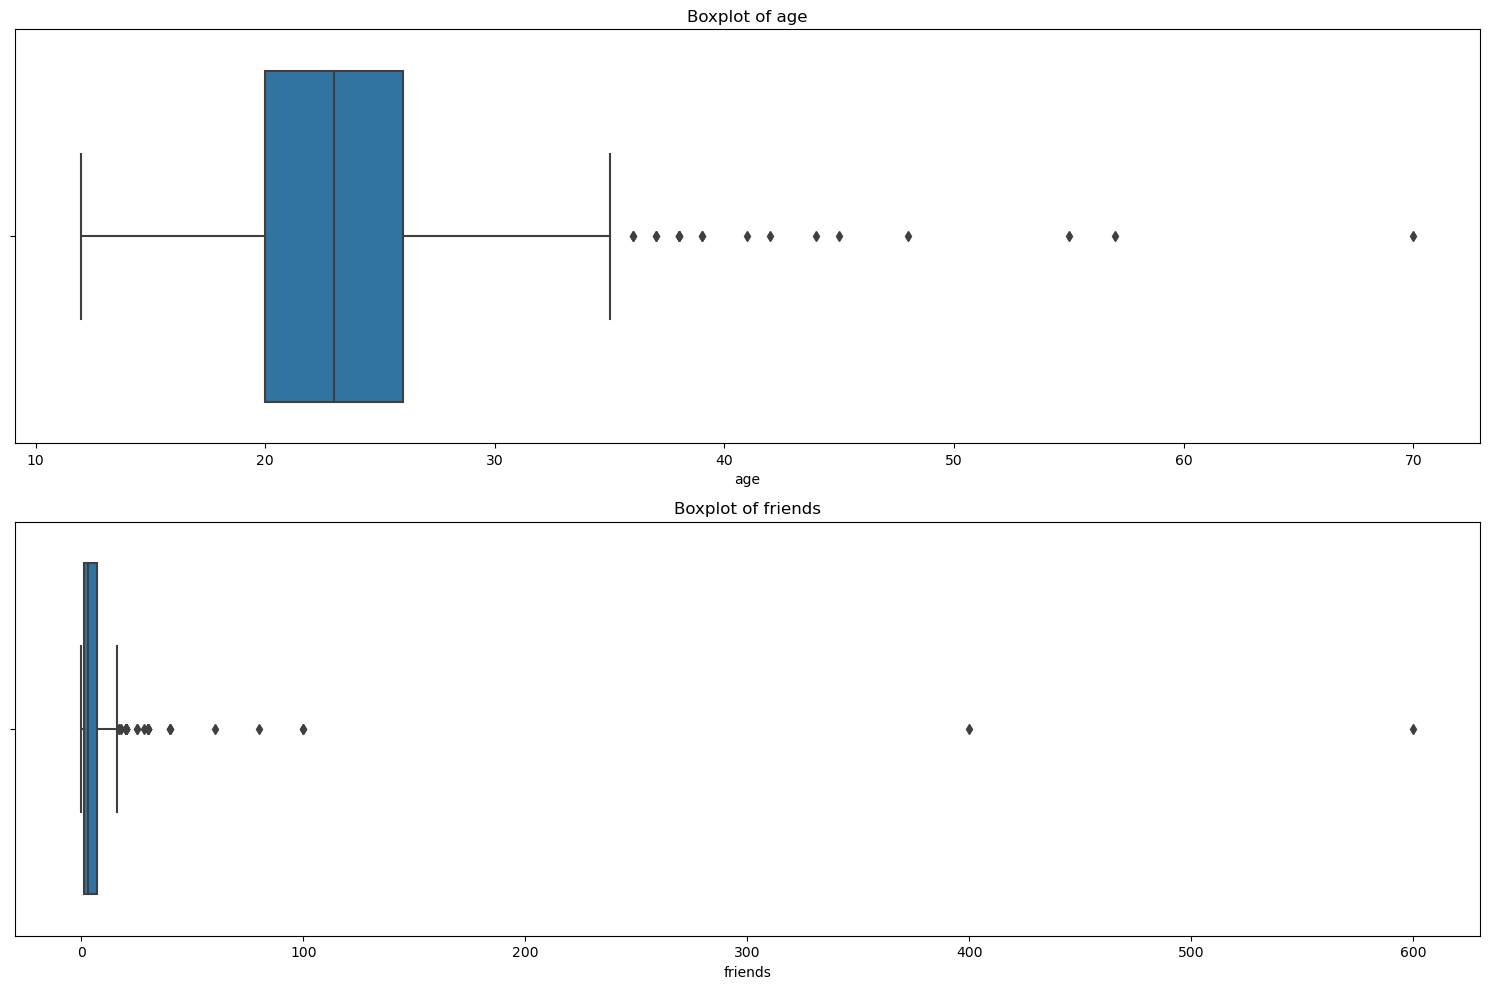

In [4]:
# Detecting outliers 
# Plot boxplot for each numeric column (age)
numeric_columns = foreveralone.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=foreveralone[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [5]:
# Cleaning Part 1 (Missing values) Check for missing values in each column
missing_values = foreveralone.isnull().sum()
print(missing_values)

time                       0
gender                     0
sexuallity                 0
age                        0
income                     0
race                       0
bodyweight                 0
virgin                     0
prostitution_legal         0
pay_for_sex                0
friends                    0
social_fear                0
depressed                  0
what_help_from_others      0
attempt_suicide            0
employment                 0
job_title                 24
edu_level                  0
improve_yourself_how     106
dtype: int64


In [6]:
# Impute missing values in 'job_title' with 'Unknown'
foreveralone['job_title'].fillna('Unknown', inplace=True)

# Impute missing values in 'improve_yourself_how' with 'No response'
foreveralone['improve_yourself_how'].fillna('No response', inplace=True)

In [7]:
# Verify the changes
missing_values_after = foreveralone.isnull().sum()
print("Missing values after handling:\n", missing_values_after)

Missing values after handling:
 time                     0
gender                   0
sexuallity               0
age                      0
income                   0
race                     0
bodyweight               0
virgin                   0
prostitution_legal       0
pay_for_sex              0
friends                  0
social_fear              0
depressed                0
what_help_from_others    0
attempt_suicide          0
employment               0
job_title                0
edu_level                0
improve_yourself_how     0
dtype: int64


In [8]:
#Part II Remove duplicates:
foreveralone.drop_duplicates(inplace=True)

In [9]:
#PartIII Removing special characters
import re

# Define a regex pattern for special characters
special_char_pattern = re.compile(r'[^\w\s]')  # Matches any character that is not a word character or whitespace

# Function to check for special characters in a column
def check_for_special_chars(column):
    return column.apply(lambda x: bool(special_char_pattern.search(str(x))))

# Apply the function to each column
special_char_results = pd.DataFrame()
for column in foreveralone.columns:
    special_char_results[column] = check_for_special_chars(foreveralone[column])

# Identify rows and columns with special characters 
#11 columns with special characters
rows_with_special_chars = special_char_results.any(axis=1)
columns_with_special_chars = special_char_results.any(axis=0)

# Print rows and columns with special characters
#[469 rows x 19 columns]
print("Rows with special characters:\n", foreveralone[rows_with_special_chars])
print("\nColumns with special characters:\n", columns_with_special_chars)

Rows with special characters:
                    time  gender sexuallity  age              income  \
0    5/17/2016 20:04:18    Male   Straight   35  $30,000 to $39,999   
1    5/17/2016 20:04:30    Male   Bisexual   21       $1 to $10,000   
2    5/17/2016 20:04:58    Male   Straight   22                  $0   
3    5/17/2016 20:08:01    Male   Straight   19       $1 to $10,000   
4    5/17/2016 20:08:04    Male   Straight   23  $30,000 to $39,999   
..                  ...     ...        ...  ...                 ...   
464    6/2/2016 5:04:24  Female   Straight   26  $10,000 to $19,999   
465   6/3/2016 19:25:46    Male   Straight   31  $30,000 to $39,999   
466    6/6/2016 1:36:55  Female   Straight   17       $1 to $10,000   
467  8/14/2016 15:10:41    Male   Straight   18                  $0   
468   9/4/2016 23:10:04    Male   Straight   28  $40,000 to $49,999   

                   race     bodyweight virgin prostitution_legal  \
0    White non-Hispanic  Normal weight    Yes   

In [10]:
#Part III Remove Special Characters and correct spelling errors
# Define patterns for cleaning
special_chars_pattern = re.compile(r'[^\w\s]')
na_patterns = ['na', 'n/a', '-', '*', '.', 'serious?', 'dunno', 'student?', 'web desihner', 'jpo;', 'what?', 'ðŸŒš', 'ggg', 'rn']

# Function to clean job titles
def clean_job_titles(job):
    job = str(job).lower().strip()  # Convert to lowercase and strip whitespace
    if job in na_patterns:
        return 'Unknown'  # Replace common patterns with 'Unknown' or similar
    job = re.sub(special_chars_pattern, '', job)  # Remove special characters
    # Additional specific cleaning rules or mappings
    if job == 'web desihner':  # Correct specific spelling error
        return 'Web designer'
    elif job == 'jpo;':  # Replace unusual job title
        return 'Unknown'
    elif job == 'what?':  # Replace ambiguous title
        return 'Unknown'
    elif 'rn' in job:  # Handle job title containing 'rn'
        return job.replace('rn', 'Registered Nurse')
    return job

# Apply the function to 'job_title' column
foreveralone['job_title_cleaned'] = foreveralone['job_title'].apply(clean_job_titles)

# Display cleaned data
print(foreveralone['job_title_cleaned'].value_counts())

job_title_cleaned
student                       82
Unknown                       26
unknown                       24
none                          19
unemployed                    15
                              ..
accounts receivable            1
zivildiener austrian stuff     1
freelance writer               1
self employed                  1
scientist                      1
Name: count, Length: 226, dtype: int64


In [11]:
#Part III 
print(foreveralone.columns)

Index(['time', 'gender', 'sexuallity', 'age', 'income', 'race', 'bodyweight',
       'virgin', 'prostitution_legal', 'pay_for_sex', 'friends', 'social_fear',
       'depressed', 'what_help_from_others', 'attempt_suicide', 'employment',
       'job_title', 'edu_level', 'improve_yourself_how', 'job_title_cleaned'],
      dtype='object')


In [12]:
#Part III Get all unique job types and their counts
job_types_counts = foreveralone['job_title_cleaned'].value_counts()

# Print all job types and their counts (data understanding)
with pd.option_context('display.max_rows', None):
    print(job_types_counts)

job_title_cleaned
student                                                                           82
Unknown                                                                           26
unknown                                                                           24
none                                                                              19
unemployed                                                                        15
engineer                                                                          12
software engineer                                                                  7
software developer                                                                 7
nothing                                                                            6
                                                                                   5
inteRegistered Nurse                                                               5
cashier                                        

In [13]:
#Part III Mapping dictionary for categorizing job titles
job_category_mapping = {
    'Unknown': ['Unknown', 'unknown', 'shit kicker', 'rather not say', 't', 'j', 'why is this obligatory', 
                'guy', 'peon', 'your survey question design is bad and you should feel bad', 's', 
                'not employed', 'u serious', 'worker', 'funemployed'],
    'Unemployed': ['none', 'nothing', 'loser', 'neet', 'no job', 'not working', 'out of work', 
                   'i dont have a job', 'parasite', 'no junkie', 'bum', 'none', 'useless', 
                   'currently unemployed', 'sugar baby', 'unemployed'],
    'Student': ['grad student', 'undergraduate', 'cgma sudent', 'gardenerstudent', 'languages', 
                'im a student', 'student', 'parttime web developer', 'student comp sci', 
                'student employee', 'student part time web developer', 'medical student', 
                'year 4 bio major', 'college student', 'research inteRegistered Nurse', 
                'masters', 'cinema student', 'high school senior'],
}

# Function to categorize job titles
def categorize_job_title(job_title):
    for category, titles in job_category_mapping.items():
        if job_title.lower() in titles:
            return category
    return job_title

# Apply the categorization function to create a new column
foreveralone['job_title_category'] = foreveralone['job_title_cleaned'].apply(categorize_job_title)

# Check the counts of each category
category_counts = foreveralone['job_title_category'].value_counts()

# Display the counts
print(category_counts)

job_title_category
Student                       98
Unknown                       63
Unemployed                    56
engineer                      12
software developer             7
                              ..
coo                            1
application developer          1
accounts receivable            1
zivildiener austrian stuff     1
scientist                      1
Name: count, Length: 188, dtype: int64


In [14]:
#Part IV zooming in into each column to clean the data set
#Remove Special Characters and correct spelling errors
# Define a function to clean edu_level column
def clean_edu_level(edu_level):
    # Replace specific values
    if edu_level == 'Masterâ€™s degree':
        return 'Masters'
    elif edu_level == 'Bachelorâ€™s degree':
        return 'Bachelor'
    # Replace special characters and handle other cases
    cleaned_edu_level = edu_level.replace('â€™', "'")
    # Additional cleaning rules or mappings can be added here if needed
    return cleaned_edu_level

# Apply the cleaning function to 'edu_level' column
foreveralone['edu_level_cleaned'] = foreveralone['edu_level'].apply(clean_edu_level)

# Display original and cleaned data to verify
print(foreveralone[['edu_level', 'edu_level_cleaned']].head(10))

# Save cleaned dataset with corrected edu_level
foreveralone.to_csv('cleaned_foreveralone.csv', index=False)

                                           edu_level  \
0                                   Associate degree   
1                            Some college, no degree   
2                            Some college, no degree   
3                            Some college, no degree   
4  High school graduate, diploma or the equivalen...   
5                                  Bachelor’s degree   
6  High school graduate, diploma or the equivalen...   
7                Trade/technical/vocational training   
8                            Some college, no degree   
9                                    Master’s degree   

                                   edu_level_cleaned  
0                                   Associate degree  
1                            Some college, no degree  
2                            Some college, no degree  
3                            Some college, no degree  
4  High school graduate, diploma or the equivalen...  
5                                  Bachelor’s degree 

In [15]:
#Part V Add and define new income columns
# Define a function to categorize income ranges
def categorize_income(income_str):
    if income_str == '$0':
        return 'No Income'
    elif income_str in ['$1 to $10,000', '$10,000 to $19,999']:
        return 'Very Low Income'
    elif income_str in ['$20,000 to $29,999', '$30,000 to $39,999', '$40,000 to $49,999']:
        return 'Low Income'
    elif income_str in ['$50,000 to $74,999', '$75,000 to $99,999', '$100,000 to $124,999']:
        return 'Average Income'
    elif income_str in ['$125,000 to $149,999', '$150,000 to $174,999', '$174,999 to $199,999']:
        return 'Above Average'
    elif income_str == '$200,000 or more':
        return 'High Income'
    else:
        return 'Very High Income'   
# Any other cases are considered very high income
# Apply the function to create a new column 'income_category'
foreveralone['income_category'] = foreveralone['income'].apply(categorize_income)

In [16]:
# Part VI weight column 
 # Replace 'Obese' with 'Overweight'
foreveralone['bodyweight'] = foreveralone['bodyweight'].replace('Obese', 'Overweight')

# Display the updated DataFrame
print(foreveralone)

                   time  gender sexuallity  age              income  \
0    5/17/2016 20:04:18    Male   Straight   35  $30,000 to $39,999   
1    5/17/2016 20:04:30    Male   Bisexual   21       $1 to $10,000   
2    5/17/2016 20:04:58    Male   Straight   22                  $0   
3    5/17/2016 20:08:01    Male   Straight   19       $1 to $10,000   
4    5/17/2016 20:08:04    Male   Straight   23  $30,000 to $39,999   
..                  ...     ...        ...  ...                 ...   
464    6/2/2016 5:04:24  Female   Straight   26  $10,000 to $19,999   
465   6/3/2016 19:25:46    Male   Straight   31  $30,000 to $39,999   
466    6/6/2016 1:36:55  Female   Straight   17       $1 to $10,000   
467  8/14/2016 15:10:41    Male   Straight   18                  $0   
468   9/4/2016 23:10:04    Male   Straight   28  $40,000 to $49,999   

                   race     bodyweight virgin prostitution_legal  \
0    White non-Hispanic  Normal weight    Yes                 No   
1    White 

In [17]:
#Part VII # Define mapping dictionary
# Include 'native american mix' in 'Mixed'
race_mapping = {
    'asian': 'Asian',
    'african': 'African',
    'black': 'African',
    'north african': 'African',
    'caucasian': 'Caucasian',
    'european': 'Caucasian',
    'white non-hispanic': 'Caucasian',
    'mixed': 'Mixed',
    'first two answers. gender is androgyne, not male; sexuality is asexual, not bi.': 'Mixed',
    'half arab': 'Mixed',
    'half asian half white': 'Mixed',
    'helicopterkin': 'Mixed',
    'hispanic (of any race)': 'Hispanic',
    'indian': 'Indian',
    'middle eastern': 'Middle Eastern',
    'pakistani': 'Middle Eastern',
    'turkish': 'Middle Eastern',
    'native american': 'Native American',
    'mixed race': 'Mixed',
    'mixed white/asian': 'Mixed',
    'multi': 'Mixed',
    'native american mix': 'Mixed',  
    'white and asian': 'Mixed',
    'white and native american': 'Mixed',
    'white non-hispanic': 'Caucasian'
}

# Apply mapping to 'race' column
foreveralone['race'] = foreveralone['race'].str.lower().replace(race_mapping)

# Check the unique values after mapping
print(foreveralone['race'].unique())

['Caucasian' 'Hispanic' 'Asian' 'Mixed' 'African' 'Middle Eastern'
 'Indian' 'Native American']


In [18]:
#Part VIII pay_for_sex is not standardised and with different answers so to standardize to yes and no 

# Replace 'Yes but I haven't' with 'No' in foreveralone DataFrame
foreveralone['pay_for_sex'] = foreveralone['pay_for_sex'].replace({'Yes but I haven\'t': 'No'})

# Replace 'Yes and I have' with 'Yes' in foreveralone DataFrame
foreveralone['pay_for_sex'] = foreveralone['pay_for_sex'].replace({'Yes and I have': 'Yes'})

# Show the updated DataFrame to confirm changes
print(foreveralone['pay_for_sex'].value_counts())

pay_for_sex
No     447
Yes     22
Name: count, dtype: int64


In [19]:
#Part IX #Binning checking columns 
columns_to_check = ['virgin', 'prostitution_legal', 'pay_for_sex', 'social_fear', 'depressed', 'attempt_suicide']

for col in columns_to_check:
    unique_values = foreveralone[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'virgin': ['Yes' 'No']
Unique values in 'prostitution_legal': ['No' 'Yes']
Unique values in 'pay_for_sex': ['No' 'Yes']
Unique values in 'social_fear': ['Yes' 'No']
Unique values in 'depressed': ['Yes' 'No']
Unique values in 'attempt_suicide': ['Yes' 'No']


In [20]:
# Map 'Yes' to 1 and 'No' to 0 for boolean conversion
foreveralone['virgin'] = foreveralone['virgin'].map({'Yes': 1, 'No': 0})
foreveralone['prostitution_legal'] = foreveralone['prostitution_legal'].map({'Yes': 1, 'No': 0})
foreveralone['pay_for_sex'] = foreveralone['pay_for_sex'].map({'Yes': 1, 'No': 0})
foreveralone['social_fear'] = foreveralone['social_fear'].map({'Yes': 1, 'No': 0})
foreveralone['depressed'] = foreveralone['depressed'].map({'Yes': 1, 'No': 0})
foreveralone['attempt_suicide'] = foreveralone['attempt_suicide'].map({'Yes': 1, 'No': 0})

# Display the updated DataFrame to verify the changes
print(foreveralone[['virgin', 'prostitution_legal', 'pay_for_sex', 'social_fear', 'depressed', 'attempt_suicide']].head())

   virgin  prostitution_legal  pay_for_sex  social_fear  depressed  \
0       1                   0            0            1          1   
1       1                   0            0            1          1   
2       1                   0            0            1          1   
3       1                   1            0            1          1   
4       0                   0            1            0          1   

   attempt_suicide  
0                1  
1                0  
2                0  
3                0  
4                0  


In [21]:
# Check unique values in 'virgin' column
print("Unique values in 'virgin':", foreveralone['pay_for_sex'].unique())

# Check value counts to see how many 'No' and 'Yes' are present
print("\nValue counts for 'pay_for_sex':")
print(foreveralone['pay_for_sex'].value_counts())

Unique values in 'virgin': [0 1]

Value counts for 'pay_for_sex':
pay_for_sex
0    447
1     22
Name: count, dtype: int64


In [22]:
#Part X #Age - create a new colum to show the age cotegory

# Define the bins and labels for generational categories based on age ranges
bins = [0, 24, 39, 49, 64, float('inf')]  # Define age ranges for each generation
labels = ['Gen Z', 'Millennial', 'Gen X', 'Baby Boomer', 'Gen Alpha']

# Create a new column 'generation' based on the bins and labels
foreveralone['generation'] = pd.cut(foreveralone['age'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame with generation column
print(foreveralone.head())

                 time gender sexuallity  age              income       race  \
0  5/17/2016 20:04:18   Male   Straight   35  $30,000 to $39,999  Caucasian   
1  5/17/2016 20:04:30   Male   Bisexual   21       $1 to $10,000  Caucasian   
2  5/17/2016 20:04:58   Male   Straight   22                  $0  Caucasian   
3  5/17/2016 20:08:01   Male   Straight   19       $1 to $10,000  Caucasian   
4  5/17/2016 20:08:04   Male   Straight   23  $30,000 to $39,999  Caucasian   

      bodyweight  virgin  prostitution_legal  pay_for_sex  ...  \
0  Normal weight       1                   0            0  ...   
1    Underweight       1                   0            0  ...   
2     Overweight       1                   0            0  ...   
3     Overweight       1                   1            0  ...   
4     Overweight       0                   0            1  ...   

   attempt_suicide                                      employment  \
0                1                              Employed f

In [23]:
# Part XI Friends Column
# Round the 'friends' column to nearest integer
foreveralone['friends'] = foreveralone['friends'].round().astype(int)

# Display the updated DataFrame with 'friends' column rounded and converted to integers
print(foreveralone.head())

                 time gender sexuallity  age              income       race  \
0  5/17/2016 20:04:18   Male   Straight   35  $30,000 to $39,999  Caucasian   
1  5/17/2016 20:04:30   Male   Bisexual   21       $1 to $10,000  Caucasian   
2  5/17/2016 20:04:58   Male   Straight   22                  $0  Caucasian   
3  5/17/2016 20:08:01   Male   Straight   19       $1 to $10,000  Caucasian   
4  5/17/2016 20:08:04   Male   Straight   23  $30,000 to $39,999  Caucasian   

      bodyweight  virgin  prostitution_legal  pay_for_sex  ...  \
0  Normal weight       1                   0            0  ...   
1    Underweight       1                   0            0  ...   
2     Overweight       1                   0            0  ...   
3     Overweight       1                   1            0  ...   
4     Overweight       0                   0            1  ...   

   attempt_suicide                                      employment  \
0                1                              Employed f

In [24]:
#Part XII Convert job titles to lowercase
foreveralone['job_title_cleaned'] = foreveralone['job_title_cleaned'].str.lower()

In [25]:
# Print the DataFrame's column names to check for discrepancies
print(foreveralone.columns)

Index(['time', 'gender', 'sexuallity', 'age', 'income', 'race', 'bodyweight',
       'virgin', 'prostitution_legal', 'pay_for_sex', 'friends', 'social_fear',
       'depressed', 'what_help_from_others', 'attempt_suicide', 'employment',
       'job_title', 'edu_level', 'improve_yourself_how', 'job_title_cleaned',
       'job_title_category', 'edu_level_cleaned', 'income_category',
       'generation'],
      dtype='object')


In [26]:
# Preprocessing List of columns to drop Drop columns base on Business objectives & Ethics guideline Attempt_suicide Sexuality, Virgin, Race, Social_fear, Job_title, Job_title_cleaned, job_title_category, Prostitution_legal, Pay_for_sex, Sexuality, gender,Friends 
columns_to_drop = [
    'race', 
    'sexuallity', 
    'attempt_suicide', 
    'social_fear', 
    'bodyweight', 
    'what_help_from_others', 
    'prostitution_legal', 
    'pay_for_sex', 
    'friends', 
    'job_title', 
    'edu_level', 
    'job_title_cleaned', 
    'income',              
    'virgin',
    'time',
    'job_title_category'    
]

# Drop the specified columns
foreveralone = foreveralone.drop(columns=columns_to_drop, errors='ignore')

# Display the first few rows of the updated DataFrame to verify
print(foreveralone.head(10))

   gender  age  depressed                                      employment  \
0    Male   35          1                              Employed for wages   
1    Male   21          1                Out of work and looking for work   
2    Male   22          1  Out of work but not currently looking for work   
3    Male   19          1                                       A student   
4    Male   23          1                              Employed for wages   
5    Male   24          1                              Employed for wages   
6    Male   22          1                              Employed for wages   
7  Female   24          1                              Employed for wages   
8    Male   20          1                              Employed for wages   
9    Male   33          1                              Employed for wages   

                                improve_yourself_how  \
0                                        No response   
1                   join clubs/socual cl

In [27]:
# Specify the file path where you want to save the Excel file
excel_file_path = 'foreveralone(final).xlsx'

# Export DataFrame to Excel
foreveralone.to_excel(excel_file_path, index=False)

print(f"DataFrame successfully exported to Excel file: {excel_file_path}")

DataFrame successfully exported to Excel file: foreveralone(final).xlsx


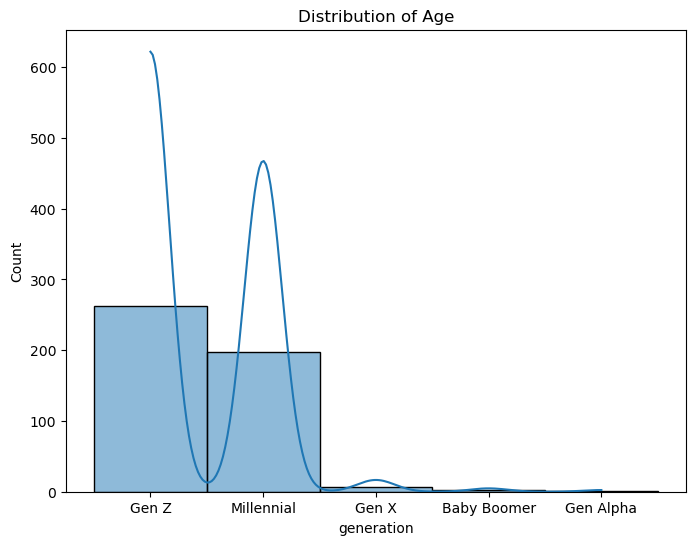

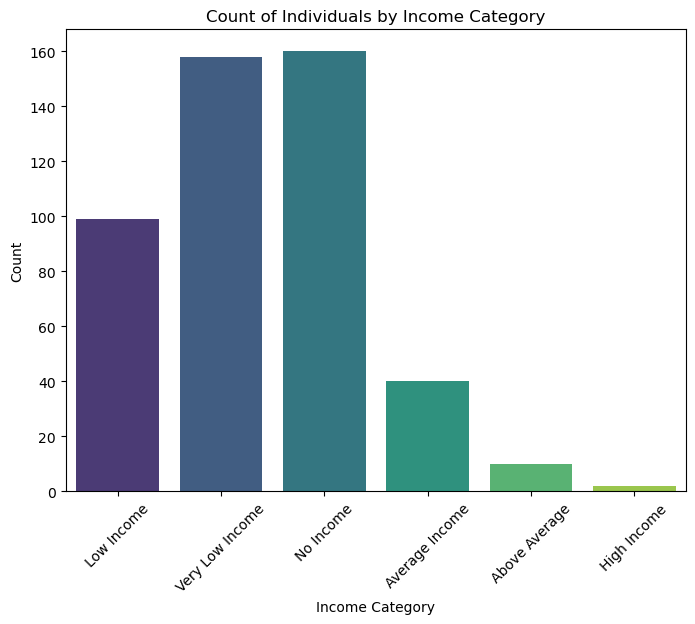

In [28]:
# Histogram of Age showing majority youngsters
plt.figure(figsize=(8, 6))
sns.histplot(data=foreveralone, x='generation', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('generation')
plt.ylabel('Count')
plt.show()

# Bar plot of Income Categories showing majority is no income to low income
plt.figure(figsize=(8, 6))
sns.countplot(data=foreveralone, x='income_category', palette='viridis')
plt.title('Count of Individuals by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

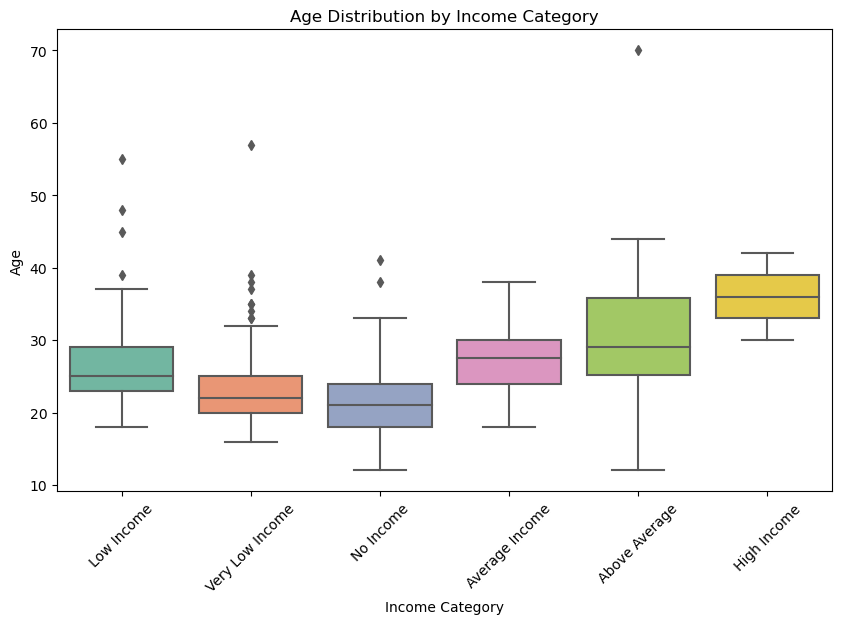

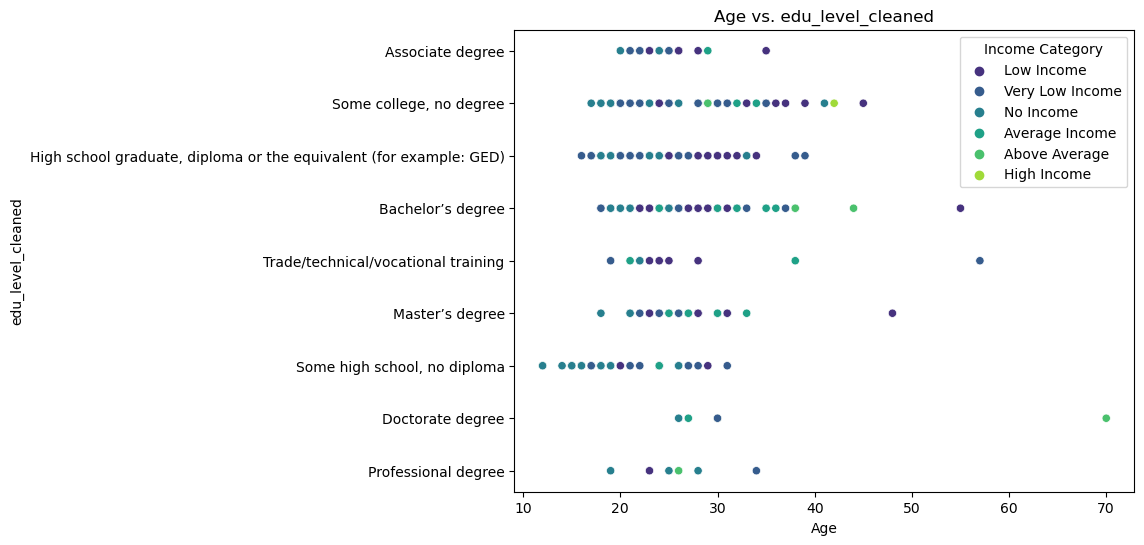

In [29]:
# Box plot of Age by Income Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=foreveralone, x='income_category', y='age', palette='Set2')
plt.title('Age Distribution by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

# Scatter plot of Age vs. Friends
plt.figure(figsize=(8, 6))
sns.scatterplot(data=foreveralone, x='age', y='edu_level_cleaned', hue='income_category', palette='viridis')
plt.title('Age vs. edu_level_cleaned')
plt.xlabel('Age')
plt.ylabel('edu_level_cleaned')
plt.legend(title='Income Category')
plt.show()

In [30]:
#Evaluate and select the most effective model for predicting depression
# number 1 model logistic Regression
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [31]:
# Print the DataFrame's column names to check
print(foreveralone.columns)

Index(['gender', 'age', 'depressed', 'employment', 'improve_yourself_how',
       'edu_level_cleaned', 'income_category', 'generation'],
      dtype='object')


In [32]:
# Define features and target
X = foreveralone.drop('depressed', axis=1)
y = foreveralone['depressed']

In [33]:
# Define categorical and numerical features
categorical_features = [
    'gender', 'employment', 'improve_yourself_how', 'edu_level_cleaned', 'income_category', 'generation'
]
numerical_features = ['age']

In [34]:
# Preprocessing for both types of data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

In [35]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# Logistic Regression Pipeline
#Pipeline is used to streamline the process of applying multiple data processing steps and model training in a structured and reproducible way. The provided code snippet creates a pipeline specifically for a logistic regression model.
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [37]:
# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [38]:

# Define SVM model pipeline
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', random_state=0))
])

In [39]:
# Train and evaluate Logistic Regression model
lr_pipeline.fit(X_train, y_train)
lr_predictions = lr_pipeline.predict(X_test)
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions)}")
print(classification_report(y_test, lr_predictions))

Logistic Regression Performance:
Accuracy: 0.6170212765957447
              precision    recall  f1-score   support

           0       0.50      0.13      0.21        54
           1       0.63      0.92      0.75        87

    accuracy                           0.62       141
   macro avg       0.56      0.52      0.48       141
weighted avg       0.58      0.62      0.54       141



In [40]:
# Train and evaluate Random Forest model
rf_pipeline.fit(X_train, y_train)
rf_predictions = rf_pipeline.predict(X_test)
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}")
print(classification_report(y_test, rf_predictions))

Random Forest Performance:
Accuracy: 0.6524822695035462
              precision    recall  f1-score   support

           0       0.58      0.33      0.42        54
           1       0.67      0.85      0.75        87

    accuracy                           0.65       141
   macro avg       0.63      0.59      0.59       141
weighted avg       0.64      0.65      0.63       141



In [41]:
# Train and evaluate SVM model
svm_pipeline.fit(X_train, y_train)
svm_predictions = svm_pipeline.predict(X_test)
print("SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, svm_predictions)}")
print(classification_report(y_test, svm_predictions))

SVM Performance:
Accuracy: 0.624113475177305
              precision    recall  f1-score   support

           0       0.57      0.07      0.13        54
           1       0.63      0.97      0.76        87

    accuracy                           0.62       141
   macro avg       0.60      0.52      0.45       141
weighted avg       0.61      0.62      0.52       141



In [42]:
# Save the trained pipeline
joblib.dump(svm_pipeline, 'svm_pipeline_model.pkl')
print("Model saved successfully.")

Model saved successfully.


In [43]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, lr_predictions)

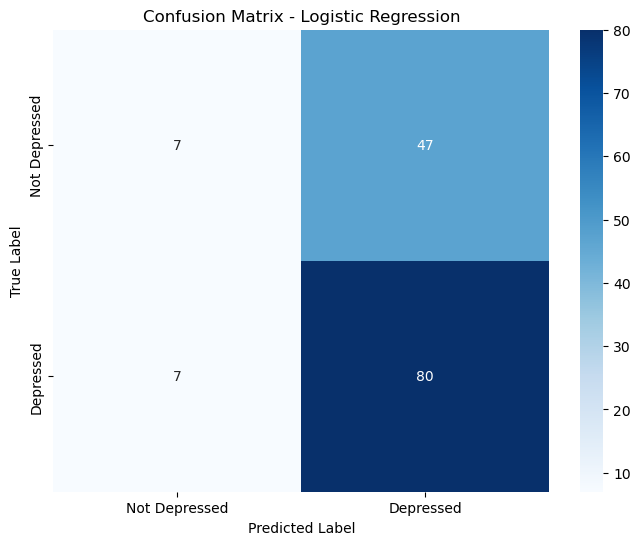

In [44]:
# Compute confusion matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, lr_predictions)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Depressed', 'Depressed'], 
            yticklabels=['Not Depressed', 'Depressed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


In [45]:
# Generate confusion matrix for Random Forest model
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

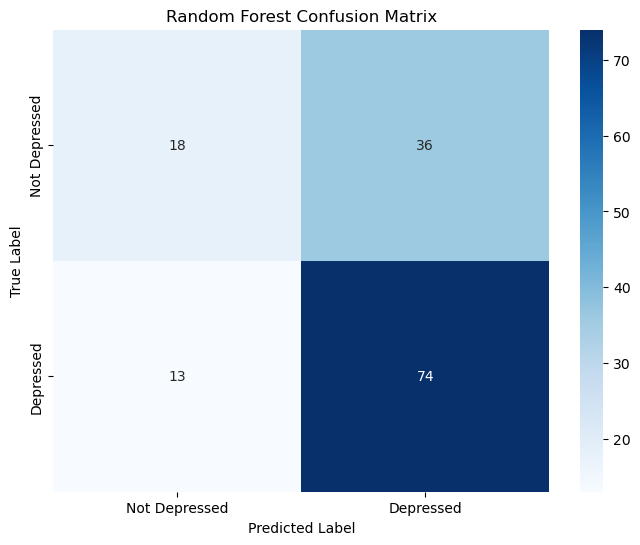

In [46]:
# Create a heatmap of the confusion matrix for Random Forest model
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Depressed', 'Depressed'], 
            yticklabels=['Not Depressed', 'Depressed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

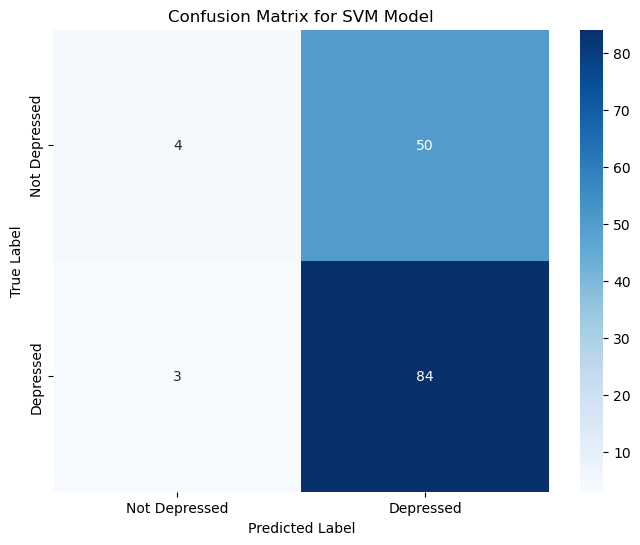

In [47]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, svm_predictions)


# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Depressed', 'Depressed'], 
            yticklabels=['Not Depressed', 'Depressed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Model')
plt.show()


In [48]:
#Function: calculate_metrics

def calculate_metrics(TN, FP, FN, TP):
    accuracy = (TN + TP) / (TN + FP + FN + TP)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    return accuracy, precision, recall, f1_score

# Confusion matrix values
rf_values = {'TN': 18, 'FP': 36, 'FN': 13, 'TP': 74}
lr_values = {'TN': 7, 'FP': 47, 'FN': 7, 'TP': 80}
svm_values = {'TN': 4, 'FP': 50, 'FN': 3, 'TP': 84}

# Calculate metrics for each model
rf_metrics = calculate_metrics(**rf_values)
lr_metrics = calculate_metrics(**lr_values)
svm_metrics = calculate_metrics(**svm_values)

# Create a DataFrame to compare metrics
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'SVM'],
    'Accuracy': [rf_metrics[0], lr_metrics[0], svm_metrics[0]],
    'Precision': [rf_metrics[1], lr_metrics[1], svm_metrics[1]],
    'Recall': [rf_metrics[2], lr_metrics[2], svm_metrics[2]],
    'F1-Score': [rf_metrics[3], lr_metrics[3], svm_metrics[3]]
})

print(comparison_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest  0.652482   0.672727  0.850575  0.751269
1  Logistic Regression  0.617021   0.629921  0.919540  0.747664
2                  SVM  0.624113   0.626866  0.965517  0.760181


In [49]:
print(rf_pipeline.named_steps)

{'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'employment',
                                  'improve_yourself_how', 'edu_level_cleaned',
                                  'income_category', 'generation'])]), 'classifier': RandomForestClassifier()}


In [50]:
# Define SVM model pipeline with probability=True
#defines a pipeline that integrates data preprocessing and model training for an SVM classifier. 
# It then trains the model using the provided training data.
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', probability=True, random_state=0))
])

# Train the SVM model
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'employment',
                                                   'improve_yourself_how',
                                                   'edu_level_cleaned',
                                                   'income_category',
                                                   'generation'])])),
                ('classifier',
                 SVC(kernel='linear', probability=True, random_state=0))])

In [51]:
# Get predicted probabilities for the positive class (depressed)
svm_probabilities = svm_pipeline.predict_proba(X_test)[:, 1]

# Create a DataFrame with the test features and predicted probabilities
results_df = X_test.copy()
results_df['Predicted_Probability'] = svm_probabilities


In [52]:
# Encode categorical features
encoded_categorical = pd.get_dummies(results_df[categorical_features], drop_first=True)

# Combine the encoded categorical features with numerical features
features_df = pd.concat([encoded_categorical, results_df[numerical_features]], axis=1)

# Add the predicted probabilities to the DataFrame
features_df['Predicted_Probability'] = results_df['Predicted_Probability']

# Compute correlations
correlations_svm = features_df.corr()['Predicted_Probability'].sort_values(ascending=False)
print(correlations_svm)

Predicted_Probability                                                                                                                                                                                       1.000000
improve_yourself_how_Cosmetic survey, Joined a gym/go to the gym, Therapy, Other exercise, join clubs/socual clubs/meet ups                                                                                 0.214480
employment_Retired                                                                                                                                                                                          0.173549
improve_yourself_how_Therapy, Other exercise, join clubs/socual clubs/meet ups                                                                                                                              0.149227
improve_yourself_how_No response                                                                                                                    

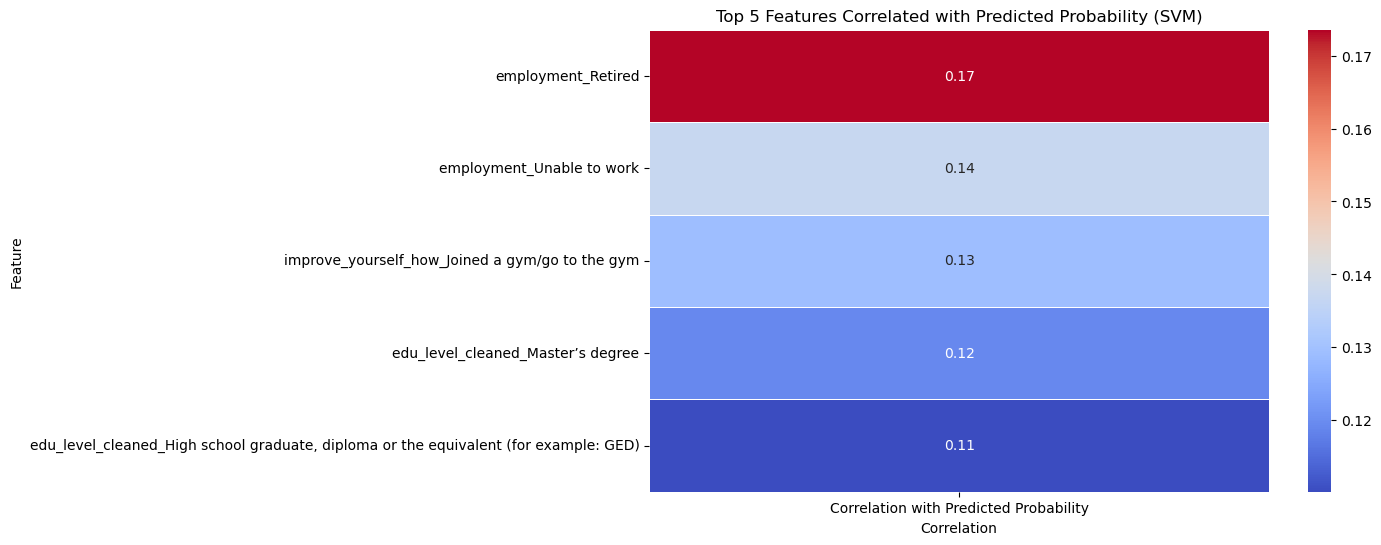

In [53]:
# HEAT MAP for Top 5
#Define the features of interest
features_of_interest = [
    'age', 'gender_Male', 'gender_Transgender female', 'gender_Transgender male',  
    'employment_Retired', 'employment_Unable to work', 'employment_Self-employed', 
    'employment_Out of work but not currently looking for work', 
    'employment_Out of work and looking for work', 'employment_Employed for wages', 'employment_Military',   
    'improve_yourself_how_Cosmetic survey', 'improve_yourself_how_Joined a gym/go to the gym', 'improve_yourself_how_Therapy', 
    'edu_level_cleaned_Master’s degree', 'edu_level_cleaned_High school graduate, diploma or the equivalent (for example: GED)',
    'income_category_No Income', 'income_category_Very Low Income', 'income_category_Low Income', 'income_category_Average Income', 'income_category_High Income',
    'generation_Millennial', 'generation_Gen X', 'generation_Baby Boomer', 'generation_Gen Alpha'
]

# Filter the correlation data to include only the features of interest
filtered_correlations = correlations_svm[correlations_svm.index.isin(features_of_interest)]

# Get the top 5 features based on correlation with predicted probabilities
top_5_filtered = filtered_correlations.dropna().sort_values(ascending=False).head(5)

# Convert the correlations to a DataFrame for the heatmap
correlation_matrix = top_5_filtered.to_frame(name='Correlation with Predicted Probability')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Top 5 Features Correlated with Predicted Probability (SVM)')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()


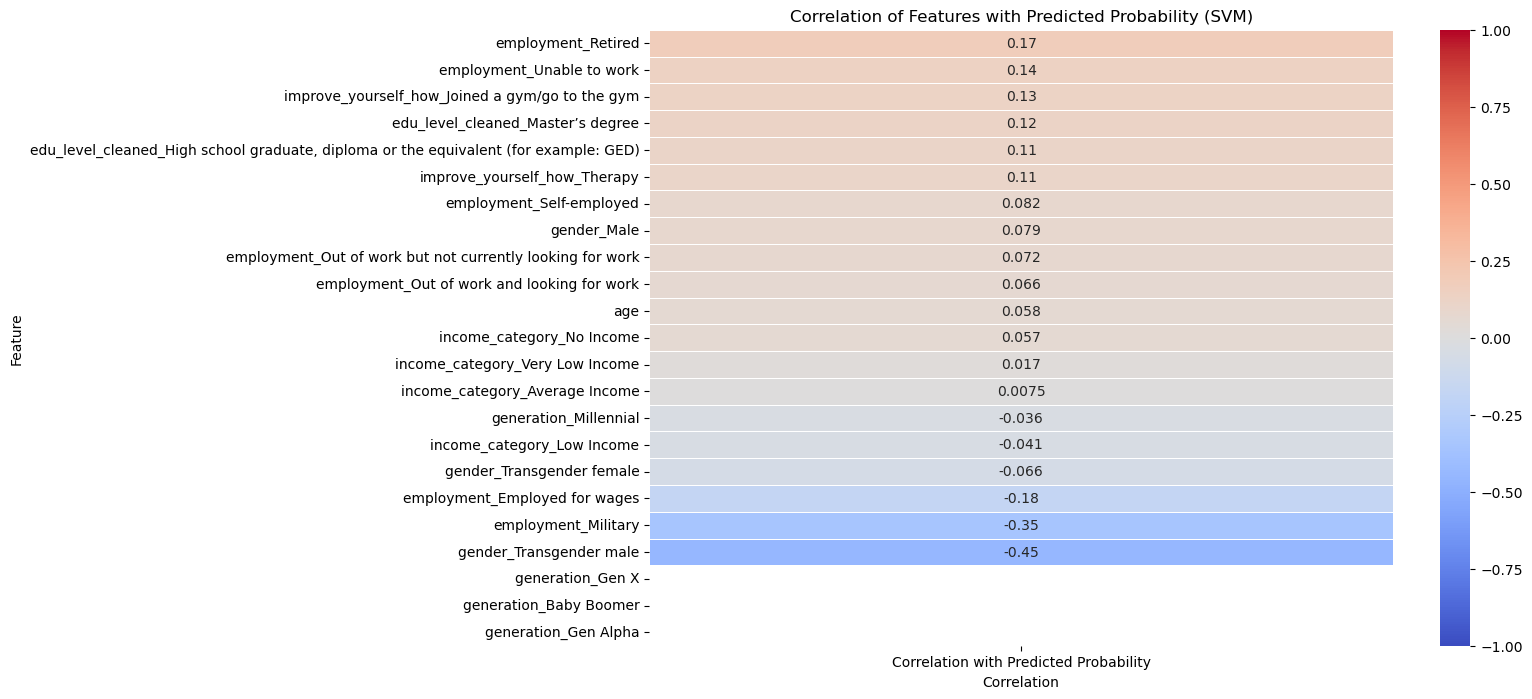

In [54]:
# Heat Map for all
# Define the features of interest
features_of_interest = [
    'age', 'gender_Male', 'gender_Transgender female', 'gender_Transgender male',   
    'employment_Retired', 'employment_Unable to work', 'employment_Self-employed', 
    'employment_Out of work but not currently looking for work', 
    'employment_Out of work and looking for work', 'employment_Employed for wages', 'employment_Military',  # 
    'improve_yourself_how_Cosmetic survey', 'improve_yourself_how_Joined a gym/go to the gym', 'improve_yourself_how_Therapy', 
    'edu_level_cleaned_Master’s degree', 'edu_level_cleaned_High school graduate, diploma or the equivalent (for example: GED)',
    'income_category_No Income', 'income_category_Very Low Income', 'income_category_Low Income', 'income_category_Average Income', 'income_category_High Income',
    'generation_Millennial', 'generation_Gen X', 'generation_Baby Boomer', 'generation_Gen Alpha'
]

# Filter the correlation data to include only the features of interest
filtered_correlations = correlations_svm[correlations_svm.index.isin(features_of_interest)]

# Convert the correlations to a DataFrame for the heatmap
correlation_matrix = filtered_correlations.to_frame(name='Correlation with Predicted Probability')

# Plot the heatmap for all selected features
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation of Features with Predicted Probability (SVM)')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()


In [55]:
# Check the distribution of the target variable
#Index(['time', 'gender', 'age', 'depressed', 'employment','improve_yourself_how', 'edu_level_cleaned', 'income_category', 'generation'], dtype='object')
print(foreveralone['depressed'].value_counts()) 

# Check the data types of the columns
print(foreveralone.dtypes)

depressed
1    312
0    157
Name: count, dtype: int64
gender                    object
age                        int64
depressed                  int64
employment                object
improve_yourself_how      object
edu_level_cleaned         object
income_category           object
generation              category
dtype: object


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.45      0.34        29
           1       0.65      0.46      0.54        65

    accuracy                           0.46        94
   macro avg       0.46      0.45      0.44        94
weighted avg       0.53      0.46      0.48        94



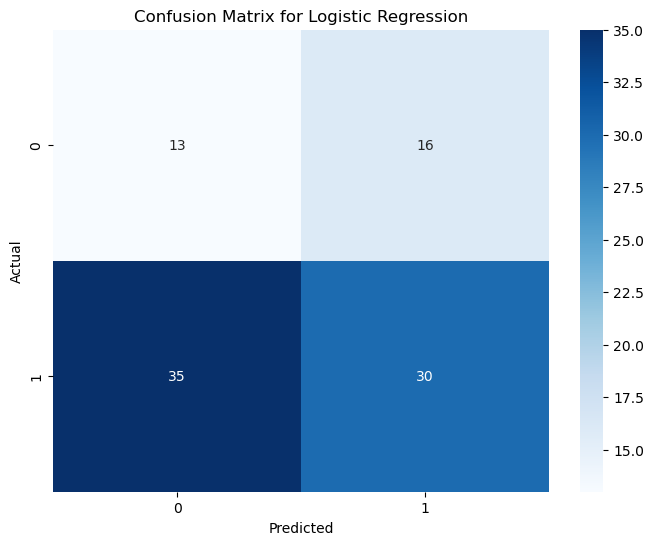

In [56]:
# Prepare features and target
X = foreveralone.drop(columns=['depressed'])
y = foreveralone['depressed']

# Define features
numeric_features = ['age']
categorical_features = ['gender', 'employment', 'improve_yourself_how', 'edu_level_cleaned', 'income_category', 'generation']

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#logistic regression model with class_weight='balanced'
logistic_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=0))
])

# Fit the model
logistic_regression_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



# Prepare features and target
X = foreveralone.drop(columns=['depressed'])
y = foreveralone['depressed']

# Define features
numeric_features = ['age']  # List all numerical feature names here
categorical_features = ['gender', 'employment', 'improve_yourself_how', 'edu_level_cleaned', 'income_category', 'generation']  # List all categorical feature names here

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Random Forest model with class_weight='balanced'
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=0))
])

# Fit the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.31      0.33        29
           1       0.71      0.75      0.73        65

    accuracy                           0.62        94
   macro avg       0.54      0.53      0.53        94
weighted avg       0.60      0.62      0.61        94



In [58]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Prepare features and target
X = foreveralone.drop(columns=['depressed'])
y = foreveralone['depressed']

# Define features
numeric_features = ['age']  # List all numerical feature names here
categorical_features = ['gender', 'employment', 'improve_yourself_how', 'edu_level_cleaned', 'income_category', 'generation']  # List all categorical feature names here

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#SVM model with class_weight='balanced'
svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', class_weight='balanced', probability=True, random_state=0))
])

# Fit the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.28      0.45      0.34        29
           1       0.66      0.48      0.55        65

    accuracy                           0.47        94
   macro avg       0.47      0.46      0.45        94
weighted avg       0.54      0.47      0.49        94



In [59]:
y_pred_logistic = logistic_regression_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

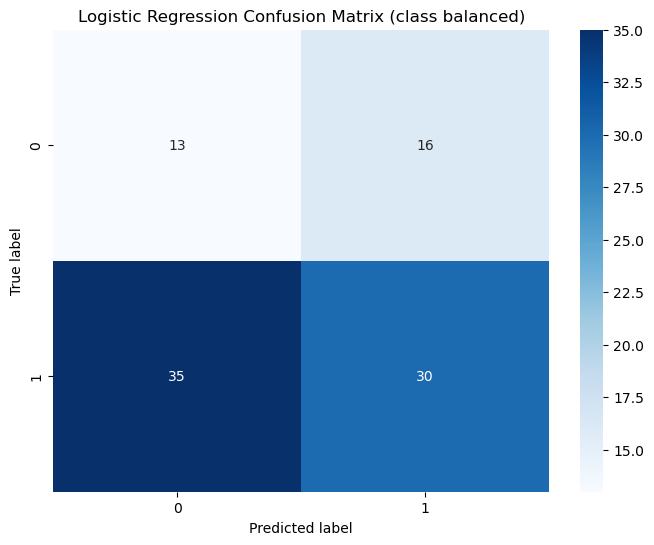

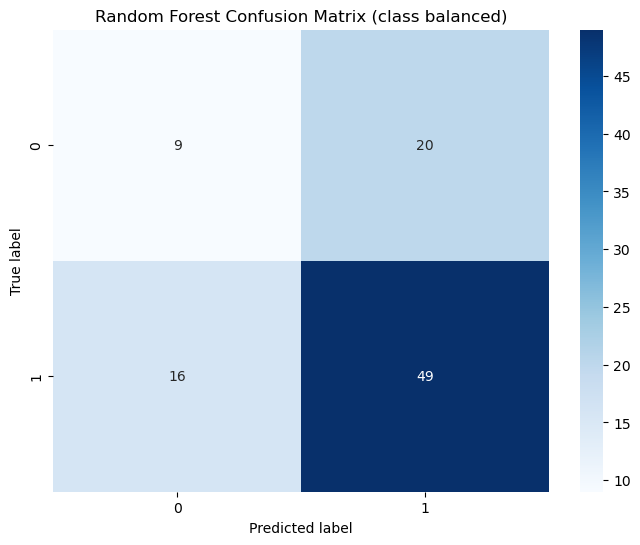

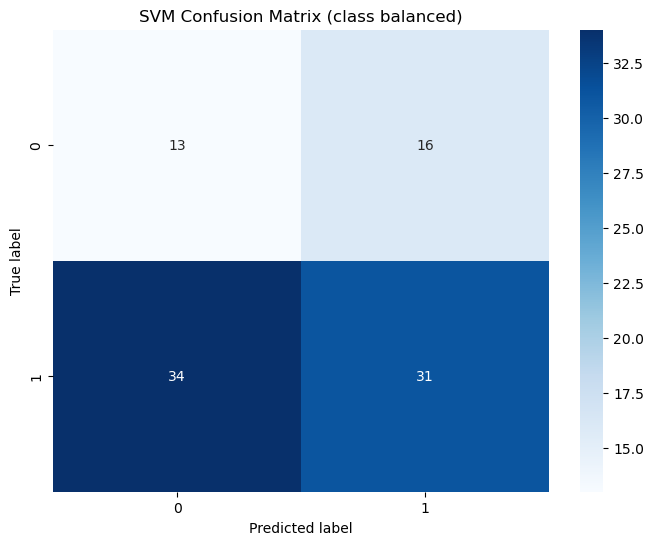

In [62]:
# Confusion Matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Logistic Regression Confusion Matrix (class balanced)')
plt.show()

# Confusion Matrix for Random Forest
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_random_forest, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Random Forest Confusion Matrix (class balanced)')
plt.show()

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('SVM Confusion Matrix (class balanced)')
plt.show()


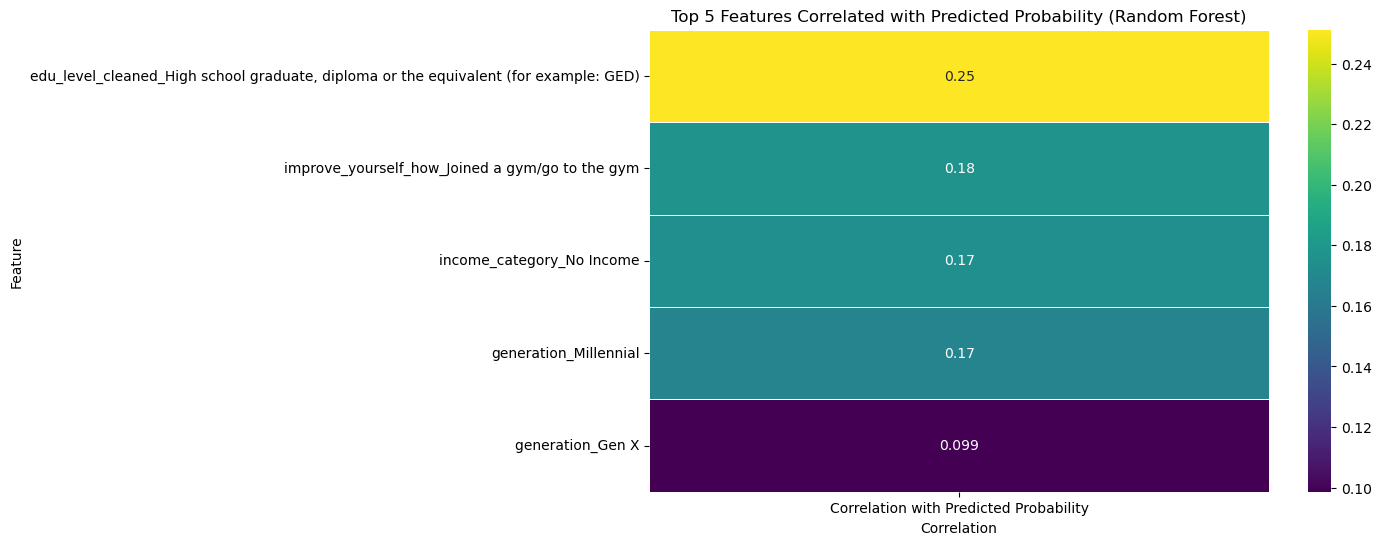

In [63]:
# Generate predicted probabilities
y_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Create a DataFrame with the predicted probabilities
df_prob = pd.DataFrame({'Predicted_Probability': y_prob_rf})
df_prob = pd.concat([df_prob, X_test.reset_index(drop=True)], axis=1)

# Encode categorical features
df_prob_encoded = pd.get_dummies(df_prob)

# Compute correlations with predicted probabilities
correlations_rf = df_prob_encoded.corr()['Predicted_Probability'].drop('Predicted_Probability')

# Define the features of interest (drop gender due to biasness)
features_of_interest = [
    'employment_Retired', 'employment_Unable to work', 'employment_Self-employed', 
    'employment_Out of work but not currently looking for work', 
    'employment_Out of work and looking for work', 'employment_Employed for wages', 'employment_Military',   
    'improve_yourself_how_Cosmetic survey', 'improve_yourself_how_Joined a gym/go to the gym', 'improve_yourself_how_Therapy', 
    'edu_level_cleaned_Master’s degree', 'edu_level_cleaned_High school graduate, diploma or the equivalent (for example: GED)',
    'income_category_No Income', 'income_category_Very Low Income', 'income_category_Low Income', 'income_category_Average Income', 'income_category_High Income',
    'generation_Millennial', 'generation_Gen X', 'generation_Baby Boomer', 'generation_Gen Alpha'
]

# Filter the correlation data to include only the features of interest
filtered_correlations = correlations_rf[correlations_rf.index.isin(features_of_interest)]

# Get the top 5 features based on absolute correlation with predicted probabilities
top_5_filtered = filtered_correlations.dropna().abs().sort_values(ascending=False).head(5)

# Convert the correlations to a DataFrame for the heatmap
correlation_matrix = top_5_filtered.to_frame(name='Correlation with Predicted Probability')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Top 5 Features Correlated with Predicted Probability (Random Forest)')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()